In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

strmData = pd.read_excel('General_Info.xlsx')
AT = strmData['Time Streamed']
AV = strmData['Avg Viewers']


In [2]:
from sklearn.model_selection import train_test_split



q_low = strmData["Time Streamed"].quantile(0.01)
q_hi  = strmData["Time Streamed"].quantile(0.95)

strmData = strmData[(strmData["Time Streamed"] < q_hi) & (strmData["Time Streamed"] > q_low)]

q_low = strmData["Avg Viewers"].quantile(0.01)
q_hi  = strmData["Avg Viewers"].quantile(0.95)

strmData = strmData[(strmData["Avg Viewers"] < q_hi) & (strmData["Avg Viewers"] > q_low)]


In [3]:
AV = strmData['Avg Viewers']
AT = strmData['Time Streamed']

AT_train1, AT_test1, AV_train1, AV_test1 = train_test_split(AT, AV, test_size=0.3, random_state=42)

AT_train = pd.DataFrame(AT_train1)
AV_train = pd.DataFrame(AV_train1)
AT_test = pd.DataFrame(AT_test1)
AV_test = pd.DataFrame(AV_test1)

# Check the sample sizes
print("Train Set :", AT_train.shape, AT.shape)
print("Test Set  :", AV_test.shape, AV.shape)

Train Set : (618, 1) (883,)
Test Set  : (265, 1) (883,)


<AxesSubplot:>

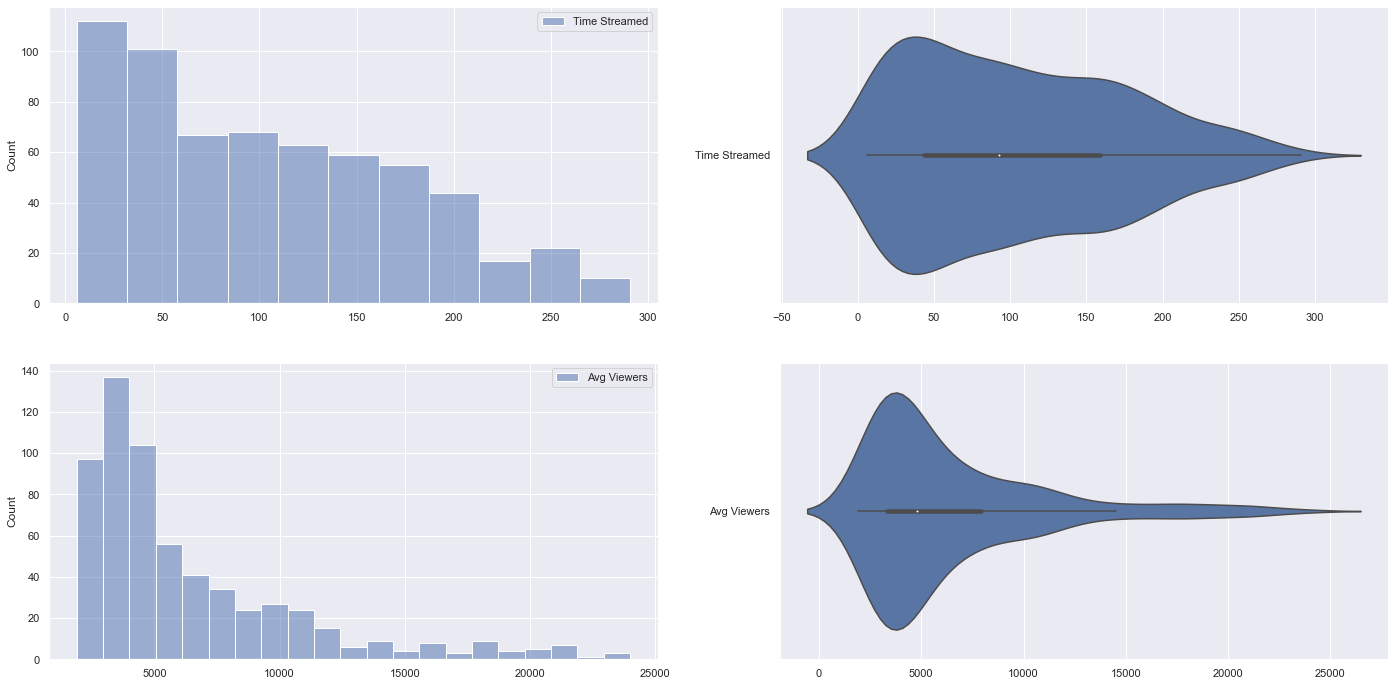

In [16]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))

# AT_train1 = AT_train1.reset_index(drop=True)
# Plot the basic uni-variate figures for HP Train
#sb.boxplot(data = AT_train, orient = "h", ax = axes[0][0])
sb.histplot(data = AT_train, ax = axes[0][0])
sb.violinplot(data = AT_train, orient = "h", ax = axes[0][1])

# # Plot the basic uni-variate figures for Total Train
#sb.boxplot(data = AV_train, orient = "h", ax = axes[1][0])
sb.histplot(data = AV_train, ax = axes[1][0])
sb.violinplot(data = AV_train, orient = "h", ax = axes[1][1])

,Time Streamed,Avg Viewers
Time Streamed,1.000000,-0.135086
Avg Viewers,-0.135086,1.000000


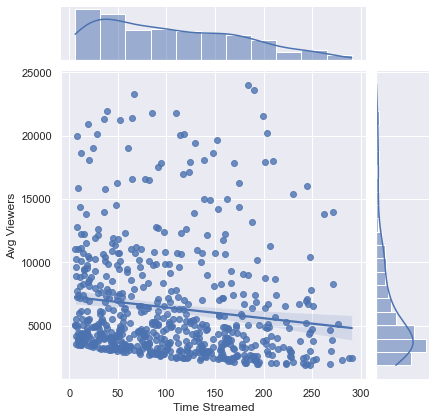

In [5]:
sb.jointplot(x=AT_train1, y=AV_train1,kind="reg")
cmp1 = pd.concat([AT_train1, AV_train1],axis=1)
cmp1.corr()

In [6]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(AT_train, AV_train)



LinearRegression()

In [7]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [7305.42212286]
Coefficients 	: a =  [[-8.52222265]]


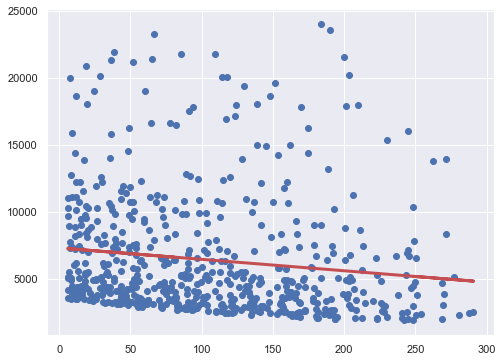

In [17]:
# Formula for the Regression line
regline_x = AT_train
regline_y = linreg.intercept_ + linreg.coef_ * AT_train

# Plot the Linear Regression line
f = plt.figure(figsize=(8, 6))
plt.scatter(AT_train, AV_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

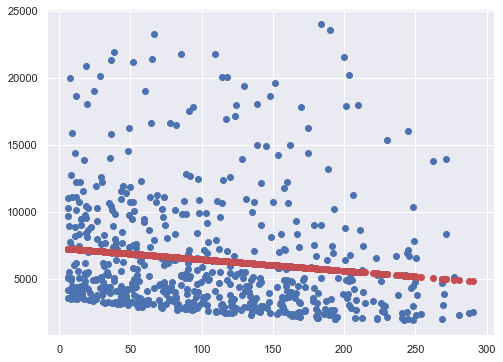

In [18]:
# Predict Total values corresponding to HP Train
AV_train_pred = linreg.predict(AT_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(8, 6))
plt.scatter(AT_train, AV_train)
plt.scatter(AT_train, AV_train_pred, color = "r")
plt.show()

Goodness of fit

In [10]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(AT_train, AV_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(AV_train, AV_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.018248146888630523
Mean Squared Error (MSE) 	: 19557543.95943994
Root Mean Squared Error (RMSE) 	: 4422.391203799132


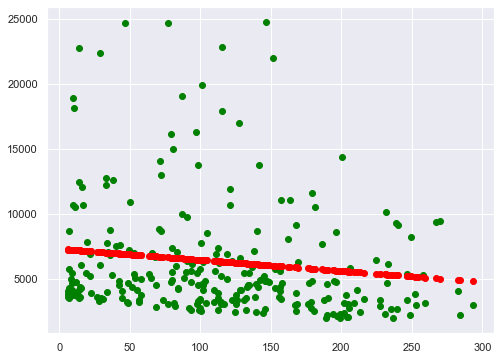

In [19]:
# Predict Total values corresponding to HP Test
AV_test_pred = linreg.predict(AT_test)

# Plot the Predictions
f = plt.figure(figsize=(8, 6))
plt.scatter(AT_test, AV_test, color = "green")
plt.scatter(AT_test, AV_test_pred, color = "red")
plt.show()

In [12]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(AT_test, AV_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(AT_test, AV_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.03035413855694924
Mean Squared Error (MSE) 	: 39173306.2031352
Root Mean Squared Error (RMSE) 	: 6258.858218807581
